In [6]:
import numpy as np  # Numerical operations and arrays
import pandas as pd  # Data manipulation and analysis
import matplotlib.pyplot as plt  # Plotting and visualization
import seaborn as sns  # Statistical graphics
import statsmodels.api as sm  # Statistical modeling
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [15]:
# Load and prepare your data
df=pd.read_csv(r'D:\Tableau\spam\spam.csv', header=0)


In [16]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Text(0.5, 1.0, 'Count of Emails by Category')

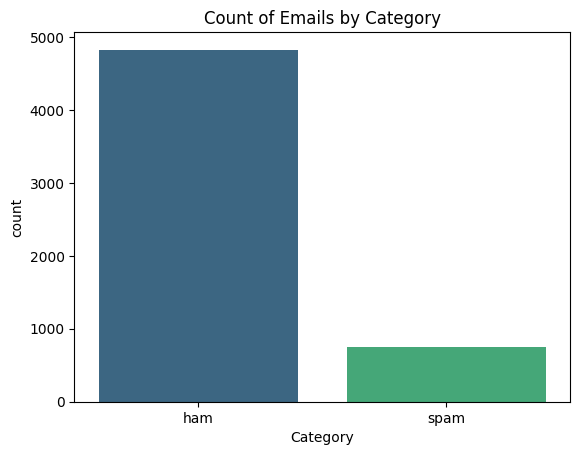

In [17]:
import warnings
warnings.filterwarnings("ignore")  # ignore all warnings

sns.countplot(x='Category',data=df, palette='viridis') # Create the count plot
plt.title('Count of Emails by Category')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [22]:
df.shape


(5572, 2)

In [40]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [47]:
# Preprocess text
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Message'])

# Encode target variable
y = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)  # Assuming 'spam' and 'not spam' labels

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int64

In [49]:
X_train

<4457x8440 sparse matrix of type '<class 'numpy.float64'>'
	with 34840 stored elements in Compressed Sparse Row format>

### Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test)

# Accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", accuracy_log_reg)
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 0.95695067264574
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       966
           1       1.00      0.68      0.81       149

    accuracy                           0.96      1115
   macro avg       0.98      0.84      0.89      1115
weighted avg       0.96      0.96      0.95      1115



### Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_clf.predict(X_test)

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9811659192825112
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.86      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



### AdaBoost Classifier

In [45]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train, y_train)

# Predictions
y_pred_ada = ada_clf.predict(X_test)

# Accuracy
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("AdaBoost Accuracy:", accuracy_ada)
print(classification_report(y_test, y_pred_ada))

AdaBoost Accuracy: 0.9730941704035875
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       966
           1       0.96      0.83      0.89       149

    accuracy                           0.97      1115
   macro avg       0.97      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



### K-Nearest Neighbors (KNN)

In [46]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predictions
y_pred_knn = knn.predict(X_test)

# Accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("K-Nearest Neighbors Accuracy:", accuracy_knn)
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Accuracy: 0.9103139013452914
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       966
           1       1.00      0.33      0.49       149

    accuracy                           0.91      1115
   macro avg       0.95      0.66      0.72      1115
weighted avg       0.92      0.91      0.89      1115



In [55]:
# Assuming 1 represents 'spam' and 0 represents 'not spam' in your dataset
spam_label = 1  # or use 'spam' if it's a string
not_spam_label = 0  # or use 'ham' if it's a string

# Initialize dictionaries to store results
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}
# Logistic Regression Results
report_log_reg = classification_report(y_test, y_pred_log_reg, output_dict=True)
results['Model'].append('Logistic Regression')
results['Accuracy'].append(accuracy_score(y_test, y_pred_log_reg))
results['Precision'].append(report_log_reg[str(spam_label)]['precision'])
results['Recall'].append(report_log_reg[str(spam_label)]['recall'])
results['F1-Score'].append(report_log_reg[str(spam_label)]['f1-score'])

# Random Forest Results
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
results['Model'].append('Random Forest')
results['Accuracy'].append(accuracy_score(y_test, y_pred_rf))
results['Precision'].append(report_rf[str(spam_label)]['precision'])
results['Recall'].append(report_rf[str(spam_label)]['recall'])
results['F1-Score'].append(report_rf[str(spam_label)]['f1-score'])

# AdaBoost Results
report_ada = classification_report(y_test, y_pred_ada, output_dict=True)
results['Model'].append('AdaBoost')
results['Accuracy'].append(accuracy_score(y_test, y_pred_ada))
results['Precision'].append(report_ada[str(spam_label)]['precision'])
results['Recall'].append(report_ada[str(spam_label)]['recall'])
results['F1-Score'].append(report_ada[str(spam_label)]['f1-score'])

# KNN Results
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
results['Model'].append('K-Nearest Neighbors')
results['Accuracy'].append(accuracy_score(y_test, y_pred_knn))
results['Precision'].append(report_knn[str(spam_label)]['precision'])
results['Recall'].append(report_knn[str(spam_label)]['recall'])
results['F1-Score'].append(report_knn[str(spam_label)]['f1-score'])

# Create a DataFrame to summarize results
results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.956951    1.00000  0.677852  0.808000
1        Random Forest  0.981166    1.00000  0.859060  0.924188
2             AdaBoost  0.973094    0.96124  0.832215  0.892086
3  K-Nearest Neighbors  0.910314    1.00000  0.328859  0.494949


## Observations:

**Accuracy:**

Random Forest achieved the highest accuracy (98.12%), closely followed by AdaBoost (97.31%) and Logistic Regression (95.70%).
K-Nearest Neighbors (KNN) has the lowest accuracy (91.03%).

**Precision (Spam):**

Precision for spam detection is perfect (1.00) in Logistic Regression, Random Forest, and KNN models, meaning they have no false positives for spam.
AdaBoost has a slightly lower precision of 0.96.

**Recall (Spam):**

Random Forest shows the highest recall (0.86) for spam, meaning it correctly identifies 86% of the actual spam emails.
Logistic Regression and AdaBoost have a recall of 0.68 and 0.83, respectively.
KNN has a very low recall (0.33), meaning it misses a significant number of spam emails.

**F1-Score (Spam):**

Random Forest has the highest F1-Score (0.92), indicating a good balance between precision and recall.
AdaBoost and Logistic Regression follow with F1-Scores of 0.89 and 0.81, respectively.
KNN has the lowest F1-Score (0.49), reflecting its poor recall despite perfect precision.

**Conclusion:**

Random Forest emerges as the best-performing model overall, with the highest accuracy, precision, recall, and F1-score.
AdaBoost and Logistic Regression also perform well, with AdaBoost being slightly better in terms of recall and F1-score than Logistic Regression.
K-Nearest Neighbors (KNN) performs the worst, especially in recall and F1-score, suggesting it is not well-suited for this classification task.

In [56]:
rf_clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
df.Category.iloc[45]

'ham'

In [60]:
df.Category.iloc[2]

'spam'